# Assignment 1


In [1]:
import sympy as sym 
import sympy.vector
from sympy import Derivative, symbols, cos, sin, simplify, sqrt, Matrix
from sympy.physics.mechanics import *
init_vprinting()

In [2]:
theta, beta, gamma, theta_M = symbols('theta beta gamma theta_M')

## Question 1

### b) 
Let the variables with "M" subscripts denote quantities in the moving frame. 

$dN = n(\theta, \phi) d\Omega$  

$dN_M = n_M(\theta_M, \phi_M) d\Omega_M$ 

Where: 

$d\Omega = \sin(\theta) d\theta d\phi$ 

$d\Omega_M = \sin(\theta_M) d\theta_M d\phi_M$

$\theta$ is the angle light makes with the x-axis in the stationary frame.

$\theta_M$ is the angle light makes with the x-axis in the moving frame.

#### Here is what we know: 
$n(\theta, \phi) = Constant$ $\because$ Stars are isotropic in stationary frame

$N = N_M$ $\because$ Total amount of start seen by both observers have to be the same. 

$\therefore dN = dN_M$ 

We define $\theta$ and $\theta_M$ to be the polar angle relative to the $x$ and $x_M$ axis, respectively. The azimuthal angle $\phi$ is in the stationary $yz$-plane, and $\phi_M$ is in the moving $y_Mz_M$-plane. As the moving observer is moving in the $\hat{x}$ direction, there will be contraction along the $\hat{x}$ direction; therefore, $\theta \neq \theta_M$. The $yz$-plane is unaffected, thus $\phi = \phi_M$. 

$\phi = \phi_M \Rightarrow d\phi = d\phi_M$

Taking the integral of $dN$ to find $N$: 

$N = \int n(\theta, \phi) d\Omega = n(\theta, \phi) \int d\Omega  = n(\theta, \phi) \int_0^{2\pi} \int_0^{\pi} \sin(\theta) d\theta d\phi = 4\pi n(\theta, \phi)$ 

Now we find $n_M(\theta_M, \phi_M)$: 

$n_M(\theta_M, \phi_M) = \frac{dN_M}{d\Omega_M} = \frac{dN_M}{d\Omega} \frac{d\Omega}{d\Omega_M} = \frac{dN}{d\Omega} \frac{d\Omega}{d\Omega_M} = \frac{N}{4\pi} \frac{d\Omega}{d\Omega_M} = \frac{N}{4\pi} \frac{d\Omega}{d\phi} \frac{d\phi_M}{d\Omega_M} = \frac{N}{4\pi} \frac{\sin(\theta) d\theta}{\sin(\theta_M)d\theta_M}$

We know:

$\cos(\theta_M) = \frac{\cos(\theta) - \beta}{1 - \beta \cos(\theta)}$

$\therefore \frac{d}{d \theta_M} \cos(\theta_M) = \frac{d}{d \theta} \frac{\cos(\theta) - \beta}{1 - \beta \cos(\theta)}$

However, this is what the resting observer calculates for the moving observer in the basis of the rest frame. 

Shifting to the moving frame, the angle of light recieved by the moving observer: 

$\cos(\theta) = \frac{\cos(\theta_M) - \beta}{1 - \beta \cos(\theta_M)}$

$\therefore \frac{d}{d \theta} \cos(\theta) = \frac{d}{d \theta_M} \frac{\cos(\theta_M) - \beta}{1 - \beta \cos(\theta_M)}$


#### Find the Derivatives


$\frac{d}{d \theta} \cos(\theta) =$

In [3]:
xmove = cos(theta)
dxmove = Derivative(xmove, theta).doit()
dxmove

$\frac{d}{d\theta} \frac{\cos(\theta) - \beta}{1 - \beta \cos(\theta)} =$

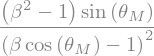

In [4]:
xstat = (cos(theta_M) - beta)/(1 - beta*cos(theta_M))
dxstat = Derivative(xstat, theta_M).doit()
dxstat.simplify() 

$
\therefore \sin(\theta) d\theta = \frac{1 - \beta^2 }{(\beta\cos(\theta_M) - 1)^2} \sin(\theta_M) d\theta_M
\Rightarrow
\frac{\sin(\theta) d\theta}{\sin(\theta_M) d\theta_M} = \frac{1 - \beta^2 }{(1 - \beta\cos(\theta_M))^2}
$ 

Combining this with what we got for $n_M(\theta_M, \phi_M)$:

$n_M(\theta_M, \phi_M) = \frac{N}{4\pi} \frac{d\Omega}{d\phi} \frac{d\phi_M}{d\Omega_M} = \frac{\sin(\theta) d\theta}{\sin(\theta_M)d\theta_M}$

We have 

$n_M(\theta_M, \phi_M) = \frac{N}{4\pi} \frac{d\Omega}{d\phi} \frac{d\phi_M}{d\Omega_M} = \frac{N}{4\pi} \frac{\sin(\theta) d\theta}{\sin(\theta_M)d\theta_M} = \frac{N}{4\pi} \left[ \frac{1 - \beta^2 }{(1-\beta\cos(\theta_M))^2} \right]$

### c)

As $\beta \rightarrow 1$:

$1-\beta^2 \rightarrow 0$

$1-\beta \cos(\theta_M) \rightarrow 1-\cos(\theta_M)$

$\therefore \frac{N}{4\pi} \left[ \frac{1 - \beta^2 }{(1-\beta\cos(\theta))^2} \right] \rightarrow 0$

This means all the stars in the sky has disappeared. 
If we look at the $1-\beta \cos(\theta)$ term we can get a sense of where they went. $1-\beta \cos(\theta)$ has a minimum value of $-1$ at $\theta = 0$ and a maximum value of $1$ at $\theta = \pi$, so when $\theta = 0$, $n_m(\theta_M, \phi_M)$ goes to infinity. This tells us all the stars are "moving" behind the moving observer as the moving observer approaches the speed of light. At the the speed of light, all the stars have condensed into a single point behind the moving observer.  

## Question 2

In [5]:
c = symbols('c')

C = sympy.vector.CoordSys3D('C')
E1, E2, E3 = symbols('E1:4')
E_vec = E1*C.i+E2*C.j+E3*C.k

B1, B2, B3 = symbols('B1:4')

v1, v2, v3 = symbols('v1:4')
v_vec = v1*C.i+v2*C.j+v3*C.k
v = sqrt(v1**2+v2**2+v3**2)

Find out what this term looks like:

$
\vec{B'} = -\frac{\gamma}{c^2} (\vec{v} \times \vec{E})
$

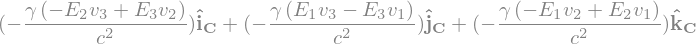

In [6]:
B_cross = -gamma/c**2*v_vec.cross(E_vec)
display(B_cross)

Here we define the various tensors: 

$F_{\mu \nu}$ (F) is the tensor for the electromagnetic field 

$F_{\mu \nu 0}$ (F0) is the tensor for the electromagnetic field in a frame where $\vec{B} = 0$

$\Lambda_{\mu'}^{\mu}$ (Lam) is the tensor that transforms F to F'

$
F'_{\mu' \nu'} = \Lambda_{\mu'}^{\mu} \Lambda_{\nu'}^{\nu} F_{\mu \nu}
$

CPU times: user 22.2 ms, sys: 9.92 ms, total: 32.1 ms
Wall time: 30.4 ms


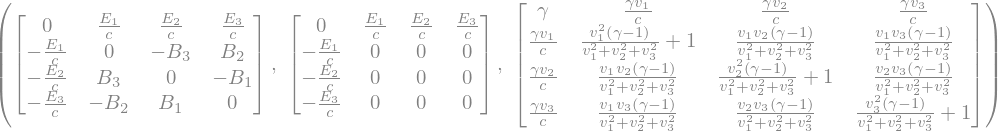

In [11]:
%%time
F = Matrix([[0, E1, E2, E3], 
            [-E1, 0, -c*B3, c*B2], 
            [-E2, c*B3, 0, -c*B1], 
            [-E3, -c*B2, c*B1, 0]])/c

F0 = F.subs({B1:0, B2:0, B3:0})

Lam = Matrix([[gamma, v1*gamma/c, v2*gamma/c, v3*gamma/c], 
              [v1*gamma/c, 1+(gamma-1)*v1**2/v**2, (gamma-1)*v1*v2/v**2, (gamma-1)*v1*v3/v**2],
              [gamma*v2/c, (gamma-1)*v2*v1/v**2, 1+(gamma-1)*v2**2/v**2, (gamma-1)*v2*v3/v**2],
              [gamma*v3/c, (gamma-1)*v3*v1/v**2, (gamma-1)*v3*v2/v**2, 1+(gamma-1)*v3**2/v**2]])
F, F0, Lam

Now we find 
$
F'_{\mu' \nu'} = \Lambda_{\mu'}^{\mu} \Lambda_{\nu'}^{\nu} F_{\mu \nu}
$

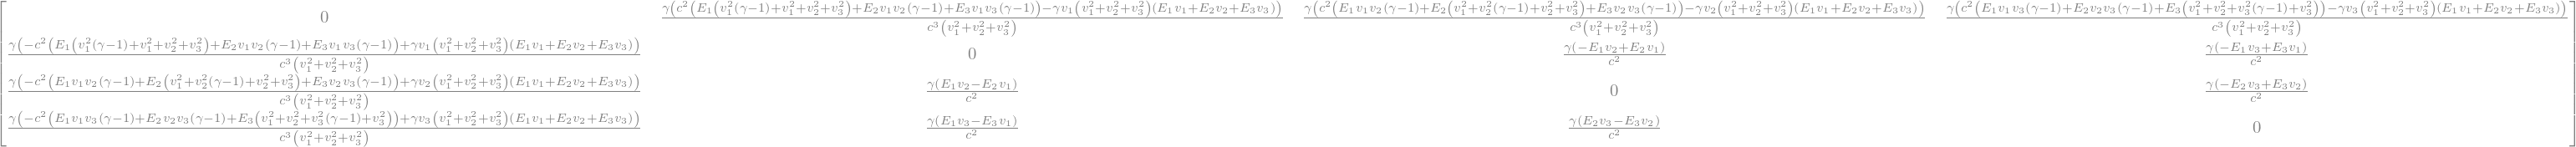

In [8]:
def f(i, j):
    a = 0
    for nu in range(4):
        for mu in range(4):
            a += Lam[i,mu]*Lam[nu,j]*F0[mu,nu]
    return(a)

F_prime = Matrix(4,4,f)

for i in range(4):
    for n in range(4):
        F_prime[i, n] = F_prime[i, n].simplify()
        
display(F_prime)

Pick out the values for $\vec{B}$:

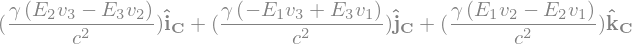

In [9]:
B_ten = (F_prime[3,2]*C.i - F_prime[3,1]*C.j + F_prime[2,1]*C.k).simplify()
display(B_ten)

Check if $\vec{B'} + \frac{\gamma}{c^2} (\vec{v} \times \vec{E}) = 0 $

In [10]:
result = B_ten - B_cross 
result.simplify()

$\vec{B'} + \frac{\gamma}{c^2} (\vec{v} \times \vec{E}) = 0$

$\therefore \vec{B'} = -\frac{\gamma}{c^2} (\vec{v} \times \vec{E})$